In [1]:
# 첫번째 시도에서는 k-prototype으로 군집화를 하였으나
# 애초에 접근 방향자체가 틀렸었다
# 이번에는 임의로 군집화하여  각 군집별 차이를 확인해 보아야겠다
# 이런 경우에는 어떤 분석 방법이 필요할까?
# 또한 num_sold가 결측치인 행들도 확인해 보아야한다
# num_sold가 0인 경우를 결측치로 해놨을지도 모르기 때문이다

# 마치 처음 분석한 것처럼 분석 로그를 작성해보자

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# matplotlib에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'  # 나눔고딕 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [10]:
################################################# 데이터 확인 ######################################################

In [11]:
train = pd.read_csv('train.csv')
train.info()
print(f'\n {train.head()}')
print('데이터 크기 : ',train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB

    id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0
데이터 크기 :  (230130, 6)


In [5]:
train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

<span style ='color : yellow; font-size : 60px;'> ------------- EDA ---------------- </span>

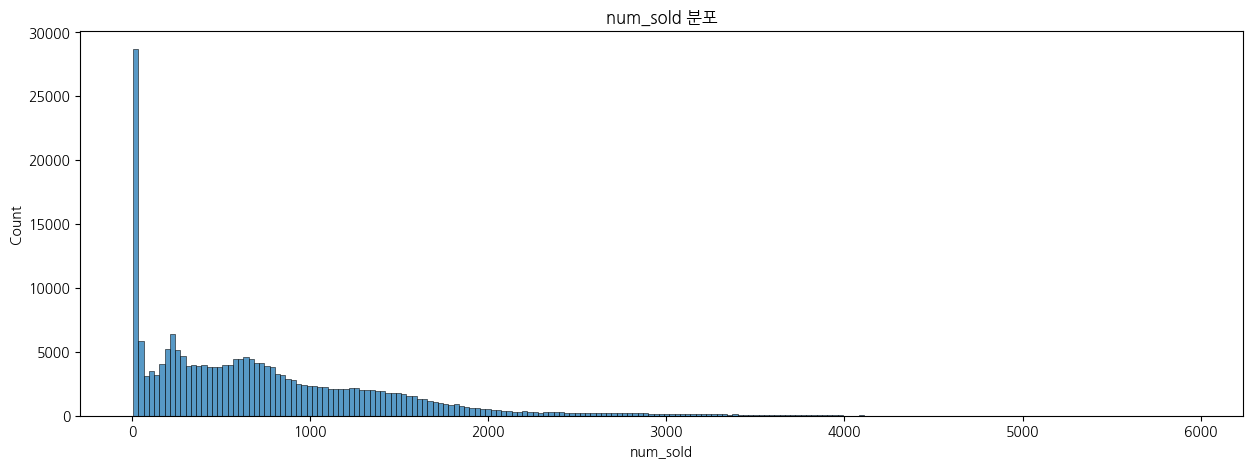

In [36]:
# 가장 관심있는 변수인 num_sold 즉, 판매량의 분포를 먼저 확인해보자
plt.figure(figsize = (15,5))
sns.histplot(x = train['num_sold'])
plt.title('num_sold 분포')
plt.show()

In [37]:
# num_sold의 분포는 왼쪽으로 매우 치우쳐있으며, 이는 판매량이 적은 케이스가 많다는 뜻이다
# num_sold가 적은 날과 많은 날은 어떤 차이가 있을까?

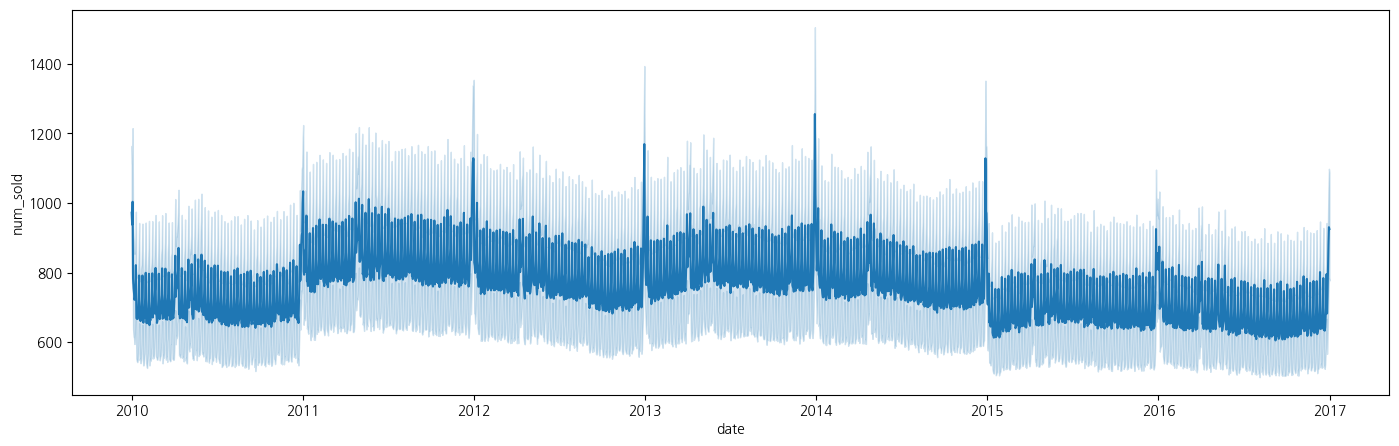

In [42]:
# 먼저 num_sold의 추이를 살펴보자
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize = (17, 5))
sns.lineplot(x = 'date', y = 'num_sold' , data = train)
plt.show()

In [44]:
# 2011 ~ 2014년의 판매량이 다른 년도 보다 높다는 것을 알 수 있다
# 월별 판매량을 보면 여름이나 겨울에 조금 더 높은 판매량을 가진다는 것을 알 수 있다

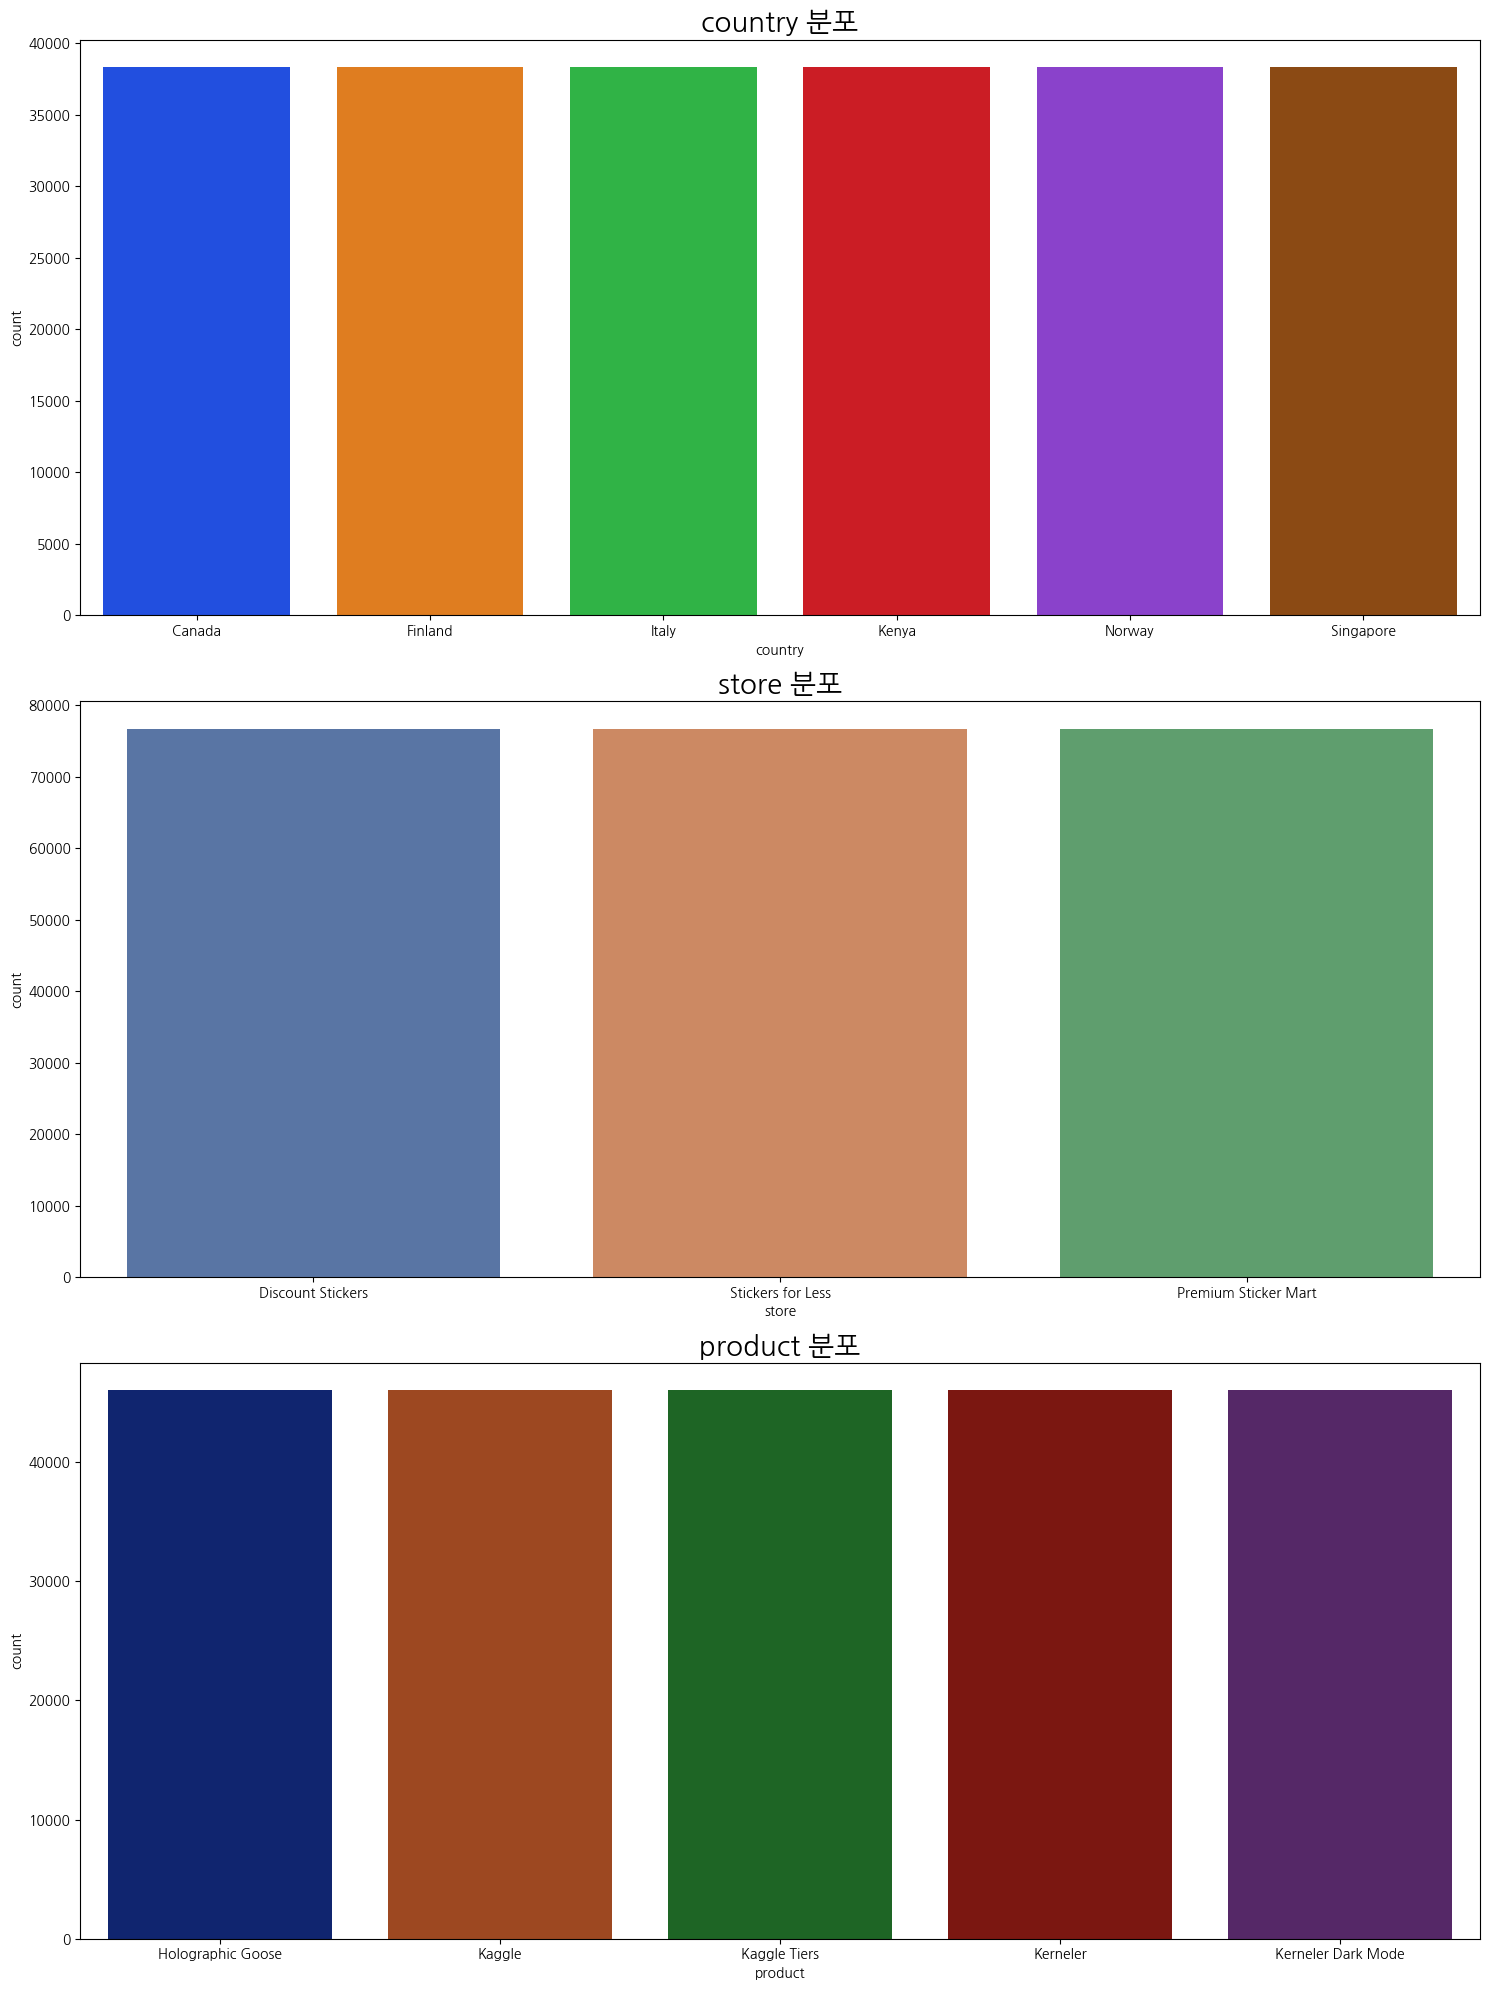

In [71]:
fig, ax = plt.subplots(3,1, figsize = (15,20))
ax = ax.flatten()

sns.countplot(data = train, x = 'country', hue = 'country', ax = ax[0], palette = 'bright')
ax[0].set_title('country 분포',fontsize=20)

sns.countplot(data = train, x = 'store', ax = ax[1], hue = 'store', palette = 'deep')
ax[1].set_title('store 분포', fontsize=20)

sns.countplot(data = train, x = 'product', ax = ax[2],hue = 'product', palette = 'dark')
ax[2].set_title('product 분포', fontsize=20)


plt.tight_layout()
plt.show()

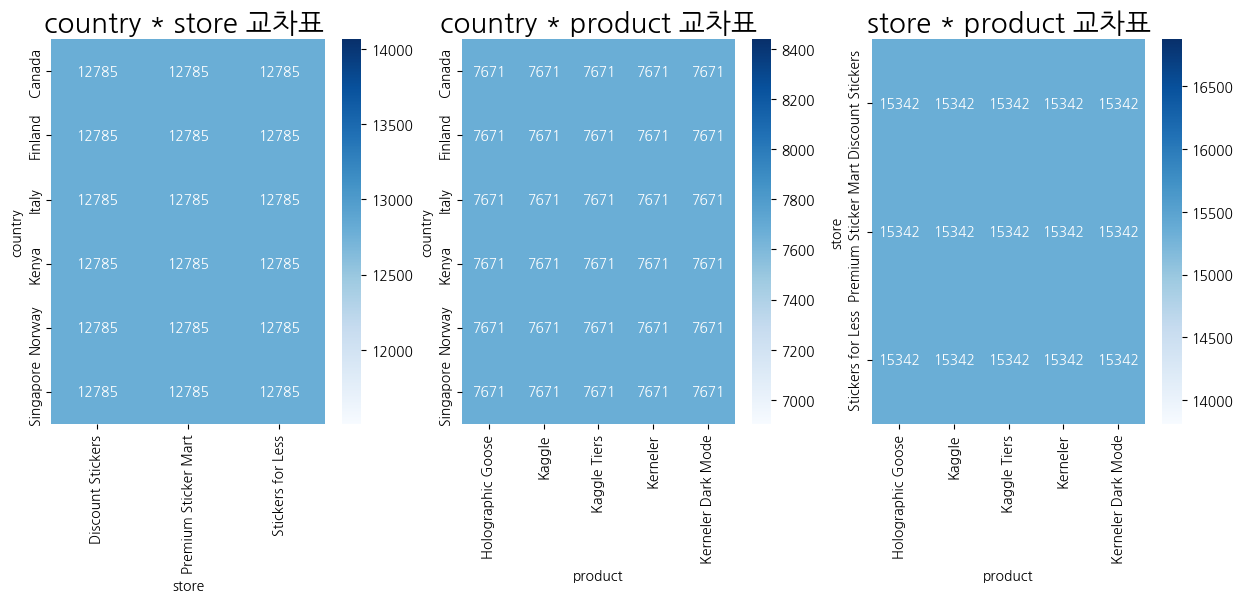

<Figure size 800x300 with 0 Axes>

In [65]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
ax = ax.flatten()
plt.figure(figsize=(8,3))

# 교차표 생성
country_store_table = pd.crosstab(train['country'],train['store'])
# 히트맵 시각화
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax = ax[0])
ax[0].set_title('country * store 교차표 ', fontsize = 20)

country_product_table = pd.crosstab(train['country'],train['product'])
sns.heatmap(country_product_table, annot=True, fmt='d', cmap='Blues', ax = ax[1])
ax[1].set_title('country * product 교차표', fontsize = 20)

store_product_table = pd.crosstab(train['store'],train['product'])
sns.heatmap(store_product_table, annot=True, fmt='d', cmap='Blues', ax = ax[2])
ax[2].set_title('store * product 교차표', fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
# 캐글에서 만들어진 데이터기 때문에 범주형 변수의 분포가 완벽하게 균일하다
# 즉 범주형 변수간의 상관관계는 존재하지 않는다

<span style ='color : yellow; font-size : 35px;'> --------------------------- country 별 시각화 ----------------------- </span>

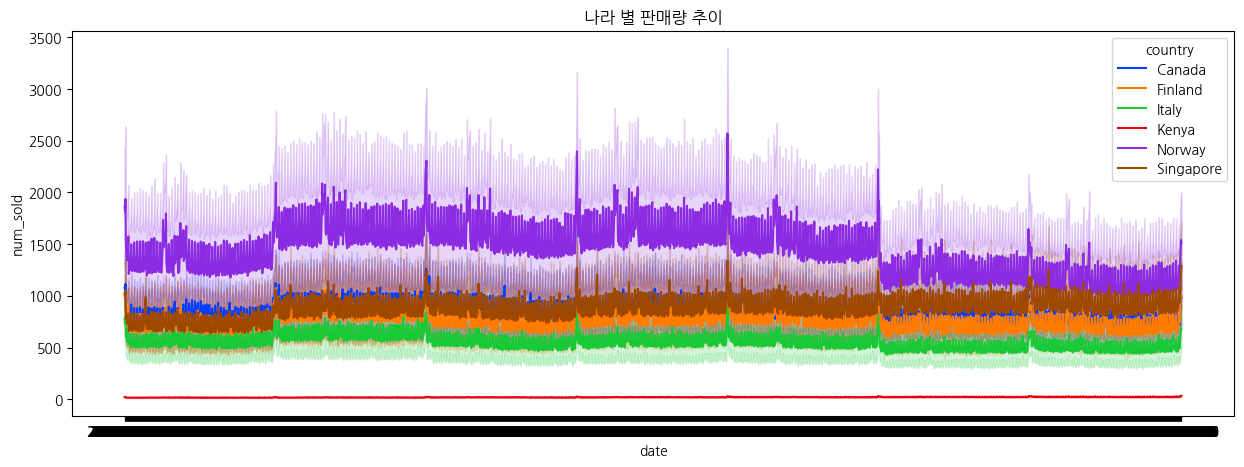

In [72]:
# country별 num_sold의 추이를 확인해보자
plt.figure(figsize = (15,5))
sns.lineplot(x= train['date'], y = train['num_sold'], hue = train['country'], palette = 'bright')
plt.title('나라 별 판매량 추이')
plt.show()

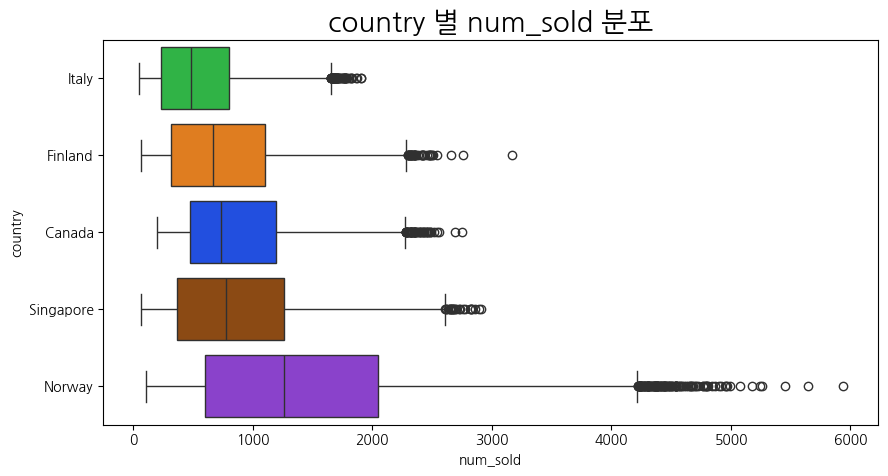

In [7]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'num_sold', y = 'country',hue='country',  palette='bright',
           order = ['Italy','Finland', 'Canada', 'Singapore', 'Norway'])
plt.title('country 별 num_sold 분포', fontsize = 20)
plt.show()

In [74]:
# 노르웨이가 압도적으로 높은 판매량이며
# 이탈리아는 핀란드, 싱가포르, 캐나다에 비해 판매량이며
# 케냐는 극단적으로 낮은 판매량이라는 것을 알 수 있다

<span style ='color : yellow; font-size : 35px;'> --------------------------- store 별 시각화 ----------------------- </span>

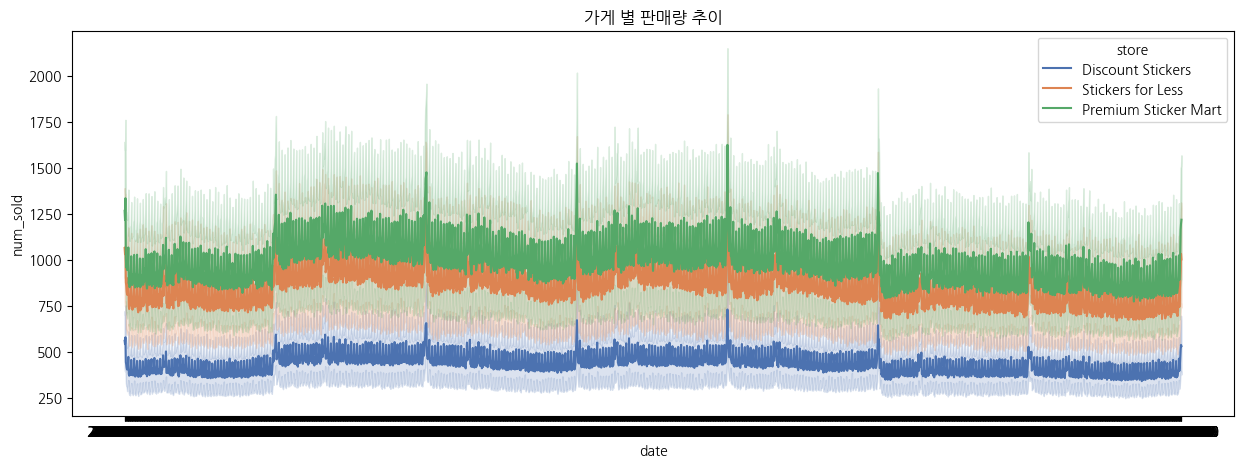

In [75]:
# store 별 num_sold 추이를 확인해보자
plt.figure(figsize = (15,5))
sns.lineplot(x= train['date'], y = train['num_sold'], hue = train['store'], palette = 'deep')
plt.title('가게 별 판매량 추이')
plt.show()

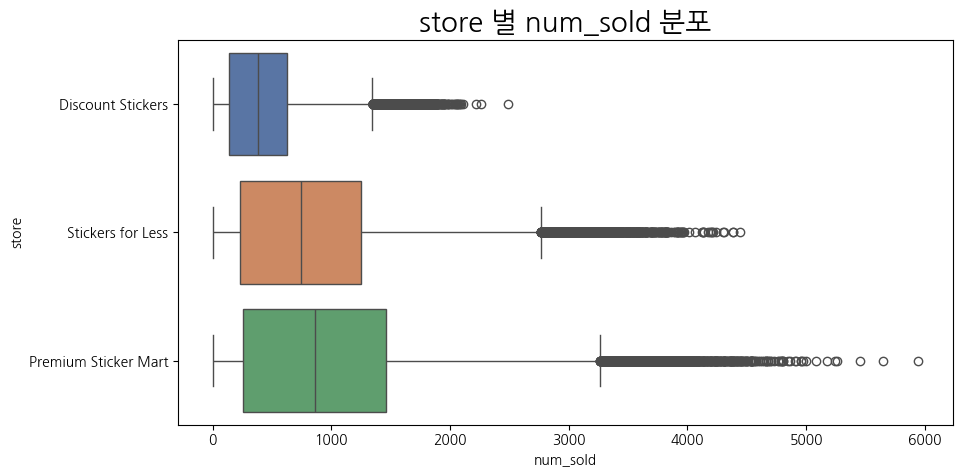

In [8]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'num_sold', y = 'store',hue='store',  palette='deep',
           order = ['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'])
plt.title('store 별 num_sold 분포', fontsize = 20)
plt.show()

In [77]:
# Premium sticker mart이 가장 높은 판매량을,
# 그리고 Stickers for Less  - Discount Stickers 순으로 판매량이 높다

<span style ='color : yellow; font-size : 35px;'> --------------------------- product 별 시각화 ----------------------- </span>

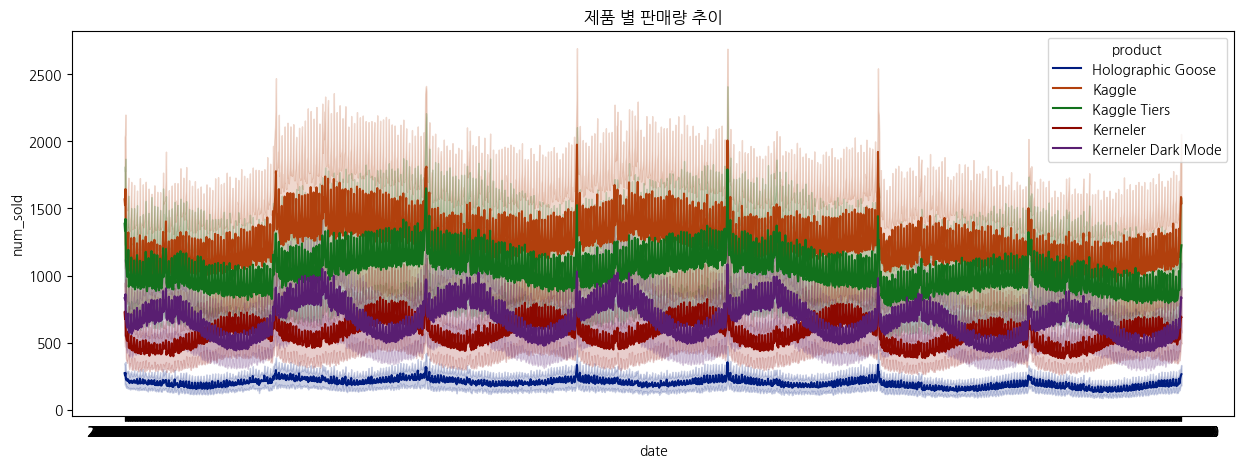

In [78]:
# product 별 num_sold 추이를 확인해보자
plt.figure(figsize = (15,5))
sns.lineplot(x= train['date'], y = train['num_sold'], hue = train['product'],  palette='dark')
plt.title('제품 별 판매량 추이')
plt.show()

In [79]:
# 제품 별로도 확실히 판매량이 다르다는 걸 알 수 있다
# 그 중에서 가장 눈에 띄는건 kernelr와 kerneler dark mode의 판매량이 서로 음의 상관관계를 가지기 때문이다
# 저 제품들이 왜 이런 패턴을 보이는지는 알 수 없지만
# 어쨌든 EDA로 모든 변수가 판매량에 영향을 미치고 있다는 것을 알 수 있다

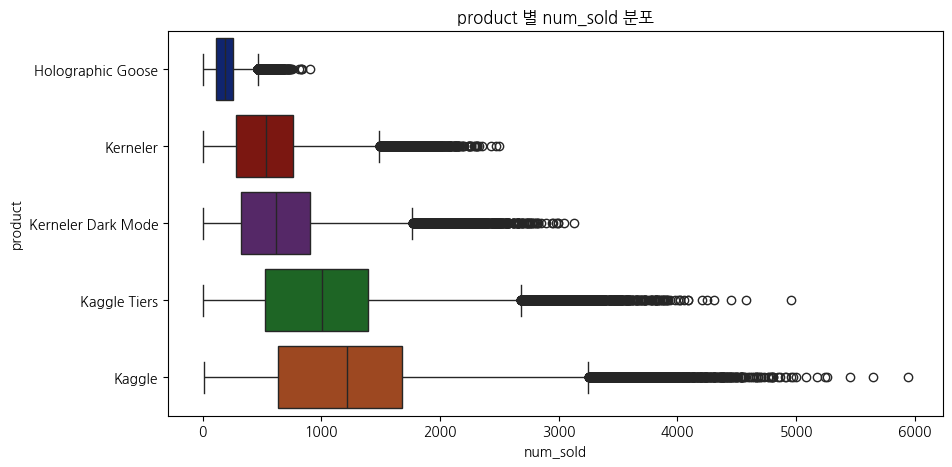

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'num_sold', y = 'product',hue='product',  palette='dark',
           order = ['Holographic Goose', 'Kerneler', 'Kerneler Dark Mode', 'Kaggle Tiers', 'Kaggle'])
plt.title('product 별 num_sold 분포')
plt.show()

In [19]:
print(train['country'].value_counts(), '\n')
print(train['store'].value_counts(), '\n')
print(train['product'].value_counts())

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64 

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64 

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


<span style ='color : yellow; font-size : 35px;'> --------------------------------결측치 분석 -------------------------</span>

In [12]:
################################################결측치 분석  ##############################################################

# (num_sold가 결측치인 이유는 num_sold가 0이였기 때문일까? 아니면 단순히 누락된 데이터인가?)
# (만약 결측치가 의미있는 결측치라면 포함을 해서 분석을 해야할 것이다)

In [49]:
# 결측치가 있는 케이스의 수는 8871개이며 모두 num_sold 변수의 결측치이다
na_train = train[train['num_sold'].isnull() == True]
na_train.shape

(8871, 6)

In [50]:
# 상황 가정_1

# 일단 결측치는 판매량인 num_sold 에만 존재한다는 점
# num_sold의 최솟값은 5로 0이 없다는 점
# 을 근거로 num_sold가 사실 num_sold = 0으로 볼 수 있는지 확인할 것이다

In [51]:
# 먼저 country별 num_sold 판매량 추이를 살펴봤을때
# 케냐와 이탈리아의 판매량이 모두 낮았다
# 만약 num_sold가 결측치인 케이스의 대부분이 케냐인 케이스라면
# num_sold의 결측치가 사실 0이라는 가정에 조금 더 확실한 증거가 될 것이다

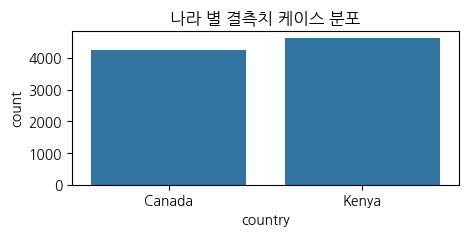

In [58]:
plt.figure(figsize = (5,2))
sns.countplot(x= 'country', data = na_train)
plt.title('나라 별 결측치 케이스 분포')
plt.show()

In [54]:
# 케냐는 예상할 수 있었지만
# 캐나다는 예상 외의 결과이다
# 어쨌든 두가지 나라에서만 판매량 결측치가 0이 존재한다는 것을 알았다

In [55]:
# 다음으로는 store의 케이스 수를 확인해볼 것이다
# 가정에 의하면 Discount_store의 num_sold가 낮은 경향을 보이기 때문에
# Discount_store의 수가 많아야할 것이다

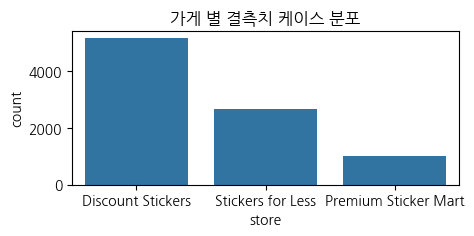

In [59]:
plt.figure(figsize = (5,2))
sns.countplot(x = 'store', data = na_train)
plt.title('가게 별 결측치 케이스 분포')
plt.show()

In [60]:
# 예상대로 DIscount stickers인 케이스가 가장 많았으며
# 다른 케이스들도 저렴한 가게 - 프리미엄 가게 순으로
# 가정에 딱 들어맞았다

In [61]:
# 다음으로는 product의 케이스 수를 확인해 볼 것이다
# 가정에 의하면 holographic goose 가 가장 많아야 하며 그다음이 kerneler, kerneler dark mode 이다

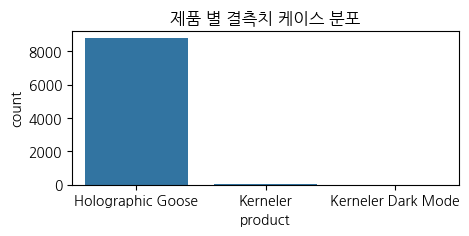

In [62]:
plt.figure(figsize = (5,2))
sns.countplot(x = 'product', data = na_train)
plt.title('제품 별 결측치 케이스 분포')
plt.show()

In [63]:
# 신기할 정도로 가정에 들어맞는다
# 이 정도면 다른 검증을 거치지 않고
# num_sold가 결측치라는 것은 num_sold = 0 이라고 해석하고 분석해야할 것이다

In [64]:
########################################### 결측치 대체를 반영한 데이터 프레임 생성 ##########################################

In [13]:
clean_train = train.copy()
clean_train['num_sold'] = train['num_sold'].fillna(0)

In [14]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  230130 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


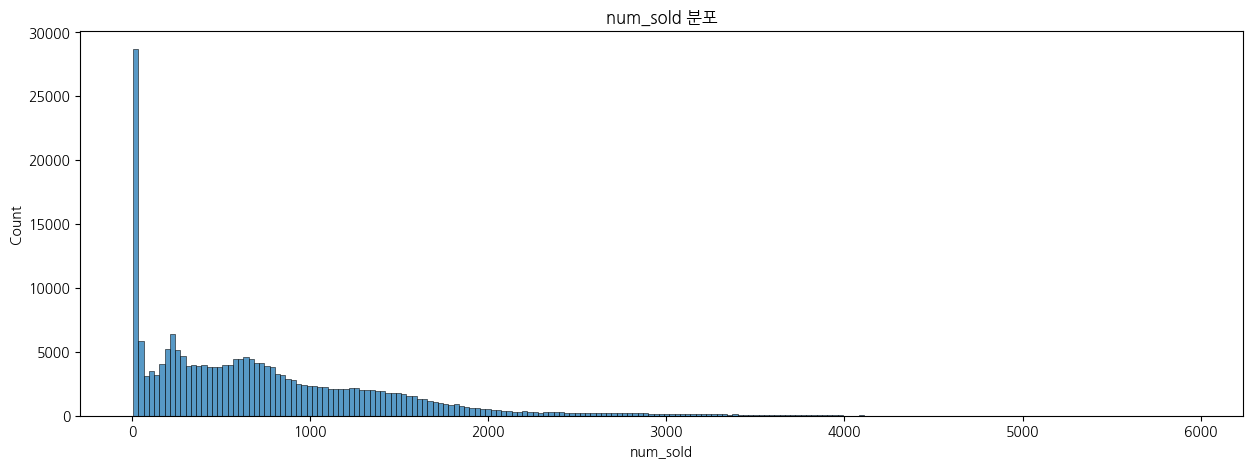

In [73]:
# 이제 다시 num_sold의 분포를 확인해보자

plt.figure(figsize = (15,5))
sns.histplot(x = train['num_sold'])
plt.title('num_sold 분포')
plt.show()

In [74]:
# 전체 케이스가 230,000개인데 비해, 결측치가 있는 케이스는 약 9000개이기 때문에 히스토그램으로는 크게 차이나지 않는다

In [75]:
# 이제 num_sold를 기준으로 낮은 판매량 케이스, 중간 판매량 케이스, 높은 판매량 케이스로 나누어 분석을 할 것이다
# 어떤 구간으로 나누어야할지 정해야한다
# 먼저 히스토그램에서 왼쪽에 솟아있는 부분(낮은 판매량 케이스)가 어디까지인지 결정해야한다

C:\Users\user\AppData\Local\Temp\ipykernel_3956\3908795853.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03415895363490201' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ratio_df.iloc[i,1] = (ratio_df.iloc[i,0] - ratio_df.iloc[i-1,0])


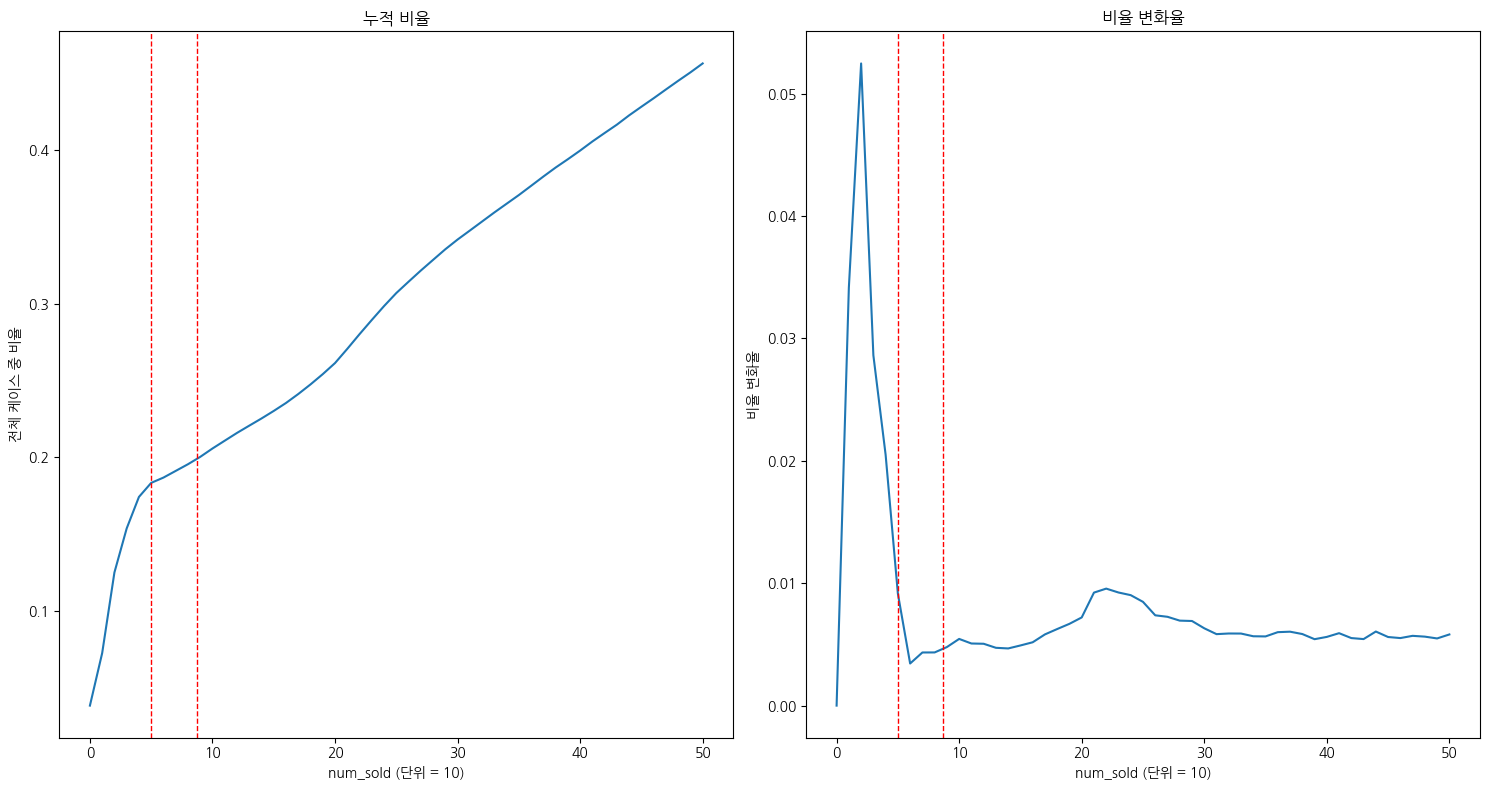

In [15]:
ran = list(range(0,501,10))

# 누적 비율 계산
ratio = []
for i in ran:
    ratio.append(clean_train[clean_train['num_sold'] <= i].shape[0] / clean_train.shape[0])

# 데이터 프레임으로 변환
ratio_df = pd.DataFrame({'ratio': ratio})

# 누적 비율 변화율 계산
ratio_df['diff'] = 0
for i in range(1, ratio_df.shape[0]):
    ratio_df.iloc[i,1] = (ratio_df.iloc[i,0] - ratio_df.iloc[i-1,0])

fig, ax = plt.subplots(1,2, figsize = (15,8))

# 누적 비율 시각화
sns.lineplot(x=ratio_df.index, y = ratio_df['ratio'], ax = ax[0])
ax[0].axvline(x=5, color='red', linestyle='--', linewidth=1, label='x=5')
ax[0].axvline(x=8.7, color='red', linestyle='--', linewidth=1, label='x=8.7')
ax[0].set_title('누적 비율')
ax[0].set_xlabel('num_sold (단위 = 10)')
ax[0].set_ylabel('전체 케이스 중 비율')

# 누적 비율 변화량 시각화
sns.lineplot(x=ratio_df.index, y = ratio_df['diff'], ax = ax[1])
ax[1].axvline(x=5, color='red', linestyle='--', linewidth=1, label='x=5')
ax[1].axvline(x=8.7, color='red', linestyle='--', linewidth=1, label='x=8.7')
ax[1].set_title('비율 변화율')

ax[1].set_xlabel('num_sold (단위 = 10)')
ax[1].set_ylabel('비율 변화율')

plt.tight_layout()
plt.show()

In [133]:
# 위의 결과를 봤을 때
# x = 5일때, 즉 num_sold가 50이하인 케이스들 많이 분포하는 경계로 지정하는 것이 좋아보인다

In [ ]:
# 그렇다면 중간 판매량 케이스와 높은 판매량 케이스를 구분하는 기준은 어떻게 정할 것인가?
# 일단 num_sold를 100단위로 늘려가며 케이스 누적 비율을 살펴보고 변화량도 살펴보자

C:\Users\user\AppData\Local\Temp\ipykernel_1020\3967227100.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1672576369877895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ratio_df.iloc[i,1] = (ratio_df.iloc[i,0] - ratio_df.iloc[i-1,0])


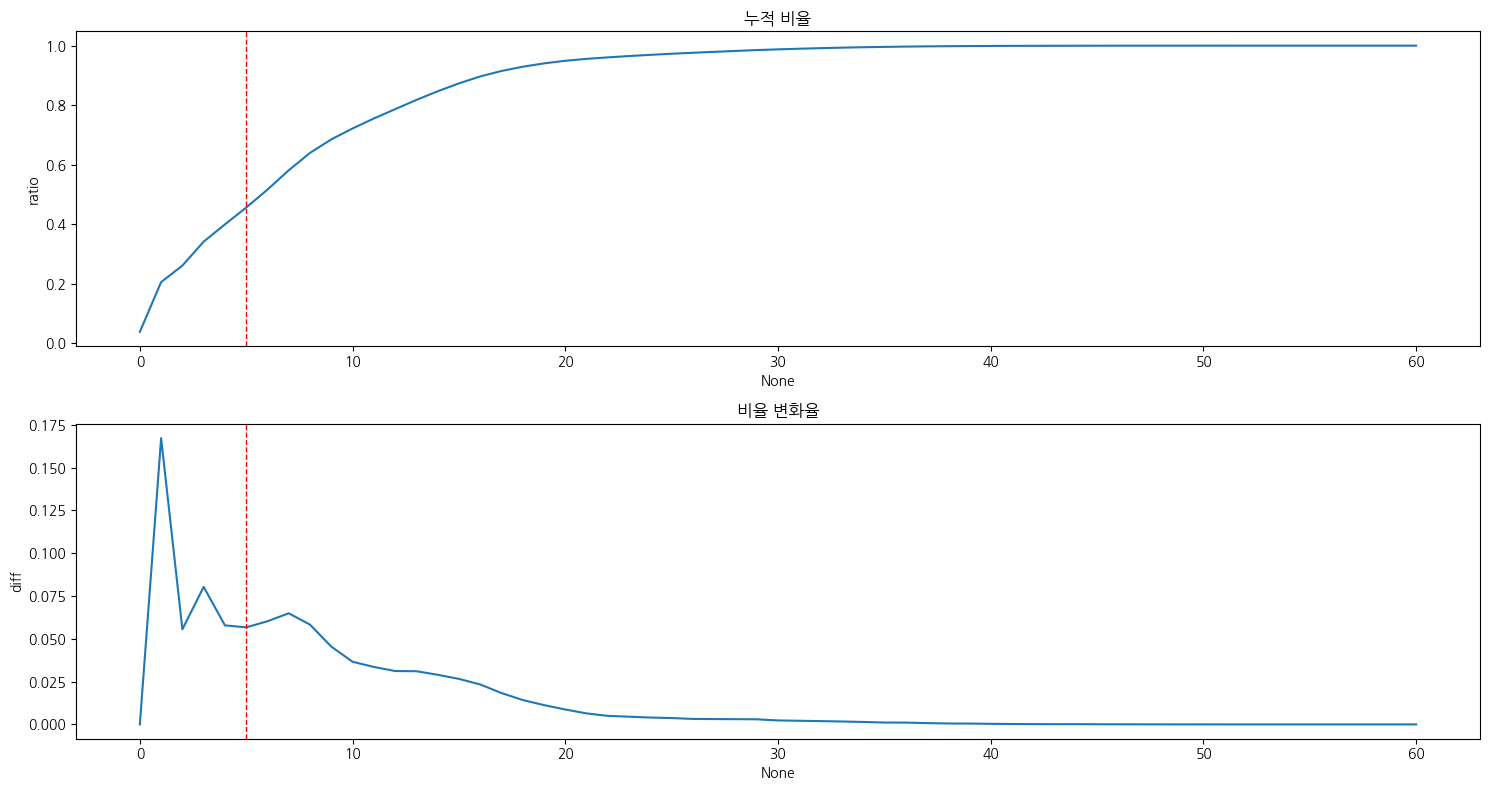

In [137]:
ran = list(range(0,6001,100))

# 누적 비율 계산
ratio = []
for i in ran:
    ratio.append(clean_train[clean_train['num_sold'] <= i].shape[0] / clean_train.shape[0])

# 데이터 프레임으로 변환
ratio_df = pd.DataFrame({'ratio': ratio})

# 누적 비율 변화율 계산
ratio_df['diff'] = 0
for i in range(1, ratio_df.shape[0]):
    ratio_df.iloc[i,1] = (ratio_df.iloc[i,0] - ratio_df.iloc[i-1,0])

fig, ax = plt.subplots(2,1, figsize = (15,8))

sns.lineplot(x=ratio_df.index, y = ratio_df['ratio'], ax = ax[0])
ax[0].axvline(x=5, color='red', linestyle='--', linewidth=1, label='x=5')
ax[0].set_title('누적 비율')

sns.lineplot(x=ratio_df.index, y = ratio_df['diff'], ax = ax[1])
ax[1].axvline(x=5, color='red', linestyle='--', linewidth=1, label='x=5')
ax[1].set_title('비율 변화율')

plt.tight_layout()
plt.show()

In [209]:
# 이 그래프만 가지고는 중간, 높은 판매량의 케이스를 구분하는 경계를 찾기 힘들다
# num_sold 변수만 가지고 k-mean 군집화를 수행해서 나눠보자

<span style ='color : yellow; font-size : 35px;'> 군집분석 방법을 통해 군집화 시도 </span>

In [139]:
############################################ k- mean 군집화로 num_sold 경계 찾기 ############################################

# 클러스터를 2~5개로 변화시켜보면서 군집분석을 수행한다

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from tqdm import tqdm


k_mean_df = clean_train.copy()
k_mean_train = k_mean_df[['num_sold']].copy() 


results = []

for n_clusters in tqdm(range(2, 6)):
    # K-Means 모델 생성 및 학습
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(k_mean_train)
    
    # 클러스터 할당
    k_mean_train[f'cluster_{n_clusters}'] = kmeans.labels_
    
    # 평가 지표 계산
    inertia = kmeans.inertia_  # 왜곡 정도
    silhouette = silhouette_score(k_mean_train, kmeans.labels_)  # 실루엣 점수
    cluster_counts = pd.Series(kmeans.labels_).value_counts().to_dict()  # 클러스터 분포
    
    # 결과 저장
    results.append({
        'n_clusters': n_clusters,
        'inertia': inertia,
        'silhouette_score': silhouette,
        'cluster_counts': cluster_counts
    })

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [43:55<00:00, 658.83s/it]

   n_clusters       inertia  silhouette_score  \
0           2  3.797982e+10          0.633955   
1           3  1.983912e+10          0.592940   
2           4  1.004142e+10          0.607286   
3           5  6.745964e+09          0.591956   

                                      cluster_counts  
0                              {1: 165954, 0: 64176}  
1                    {1: 134524, 0: 79115, 2: 16491}  
2            {1: 97107, 3: 76990, 0: 46131, 2: 9902}  
3  {1: 88877, 3: 68446, 0: 41430, 4: 23920, 2: 7457}  


In [144]:
# 결과를 따로 저장
k_mean_result_df_1 = k_mean_train.copy()
k_mean_result_score_1 = results_df.copy()

In [ ]:
# 군집분석 결과를 시각화 해보자

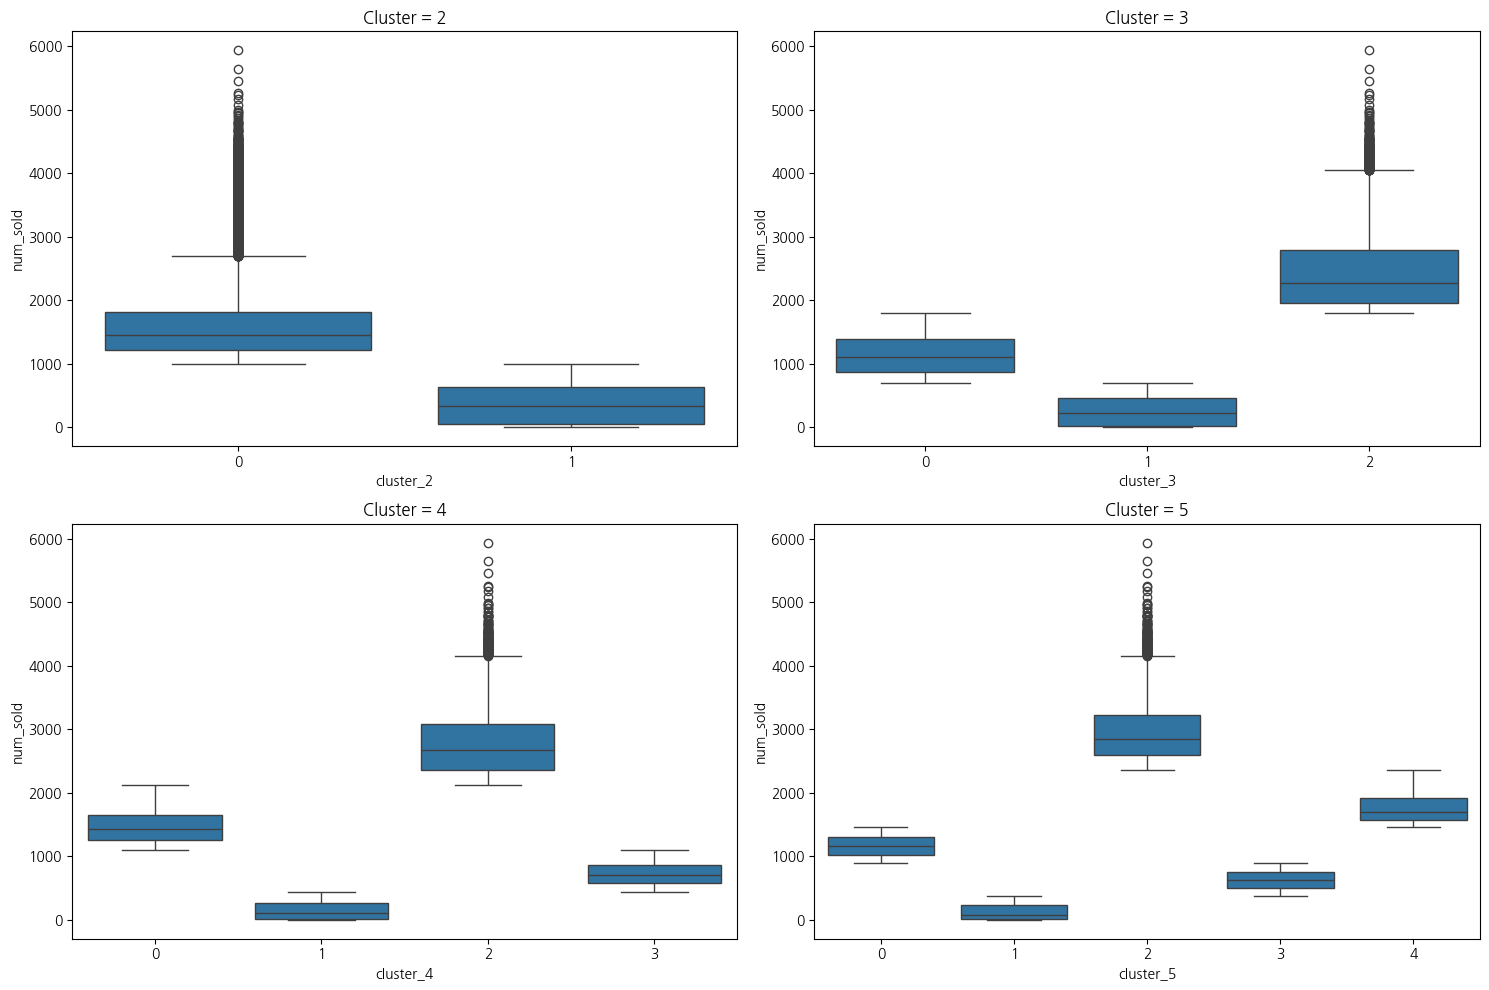

In [140]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()  

for n, i in enumerate(range(2, 6)):
    sns.boxplot(x=k_mean_train[f'cluster_{i}'], y=k_mean_train['num_sold'], ax=ax[n])
    ax[n].set_title(f'Cluster = {i}')

plt.tight_layout() 
plt.show()

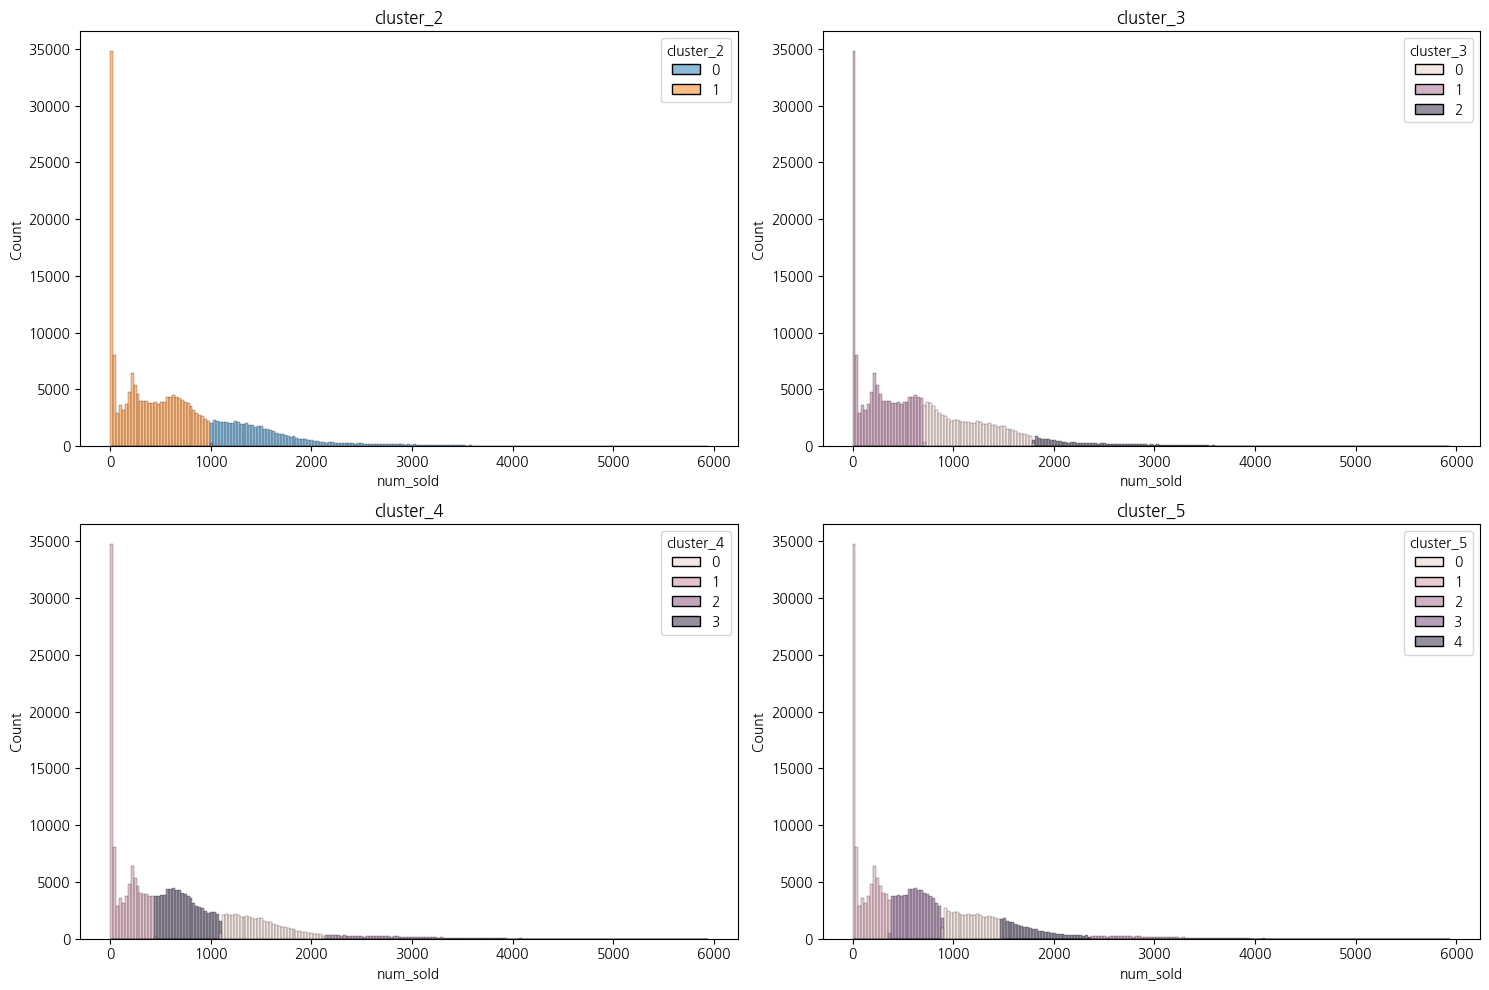

In [142]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
ax = ax.flatten()

for n, i in enumerate(range(2,6)):
    sns.histplot(x= k_mean_train['num_sold'], hue = k_mean_train[f'cluster_{i}'], alpha = 0.5, ax = ax[n])
    ax[n].set_title(f'cluster_{i}')

plt.tight_layout()
plt.show()

In [ ]:
# 그래프를 보면 내가 원하는 방향으로 군집분석이 되지 않았다
# 앞선 분석에서는 군집화를 할때 num_sold의 분포가 치우친 분포라는 것을 간과하고
# 그래도 군집분석을 수행했기 때문에 전처리를 거치고 다시 해봐야겠다

In [148]:
# 변수를 로그변환 및 표준화를 한 뒤에 다시 군집분석을 해보자

k_mean_df = clean_train.copy()
k_mean_train = k_mean_df[['num_sold']].copy() 

##################### 로그변환 및 표준화 ###########################

k_mean_train['num_sold'] = np.log1p(k_mean_train['num_sold'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
k_mean_train['num_sold'] = scaler.fit_transform(k_mean_train[['num_sold']])


###################### 다시 k-mean 군집분석 #####################################

results = []

for n_clusters in tqdm(range(2, 6)):
    # K-Means 모델 생성 및 학습
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(k_mean_train)
    
    # 클러스터 할당
    k_mean_train[f'cluster_{n_clusters}'] = kmeans.labels_
    
    # 평가 지표 계산
    inertia = kmeans.inertia_  # 왜곡 정도
    silhouette = silhouette_score(k_mean_train, kmeans.labels_)  # 실루엣 점수
    cluster_counts = pd.Series(kmeans.labels_).value_counts().to_dict()  # 클러스터 분포
    
    # 결과 저장
    results.append({
        'n_clusters': n_clusters,
        'inertia': inertia,
        'silhouette_score': silhouette,
        'cluster_counts': cluster_counts
    })

# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [52:55<00:00, 793.95s/it]

   n_clusters       inertia  silhouette_score  \
0           2  55970.887965          0.770219   
1           3  34132.685609          0.829730   
2           4  15618.938672          0.867282   
3           5  12328.106107          0.899590   

                                      cluster_counts  
0                              {0: 184372, 1: 45758}  
1                    {0: 113455, 2: 70917, 1: 45758}  
2           {0: 113455, 1: 70917, 2: 36887, 3: 8871}  
3  {0: 113455, 3: 40753, 2: 36887, 1: 30164, 4: 8...  


In [149]:
# 결과를 따로 저장
k_mean_result_df_2 = k_mean_train.copy()
k_mean_result_score_2 = results_df.copy()

In [155]:
k_mean_train = k_mean_train.drop('num_sold', axis = 1)
k_mean_train['num_sold'] = clean_train['num_sold']

In [156]:
k_mean_train.head()

,cluster_2,cluster_3,cluster_4,cluster_5,num_sold
0,1,1,3,4,0.0
1,0,0,0,0,973.0
2,0,0,0,0,906.0
3,0,2,1,3,423.0
4,0,2,1,3,491.0


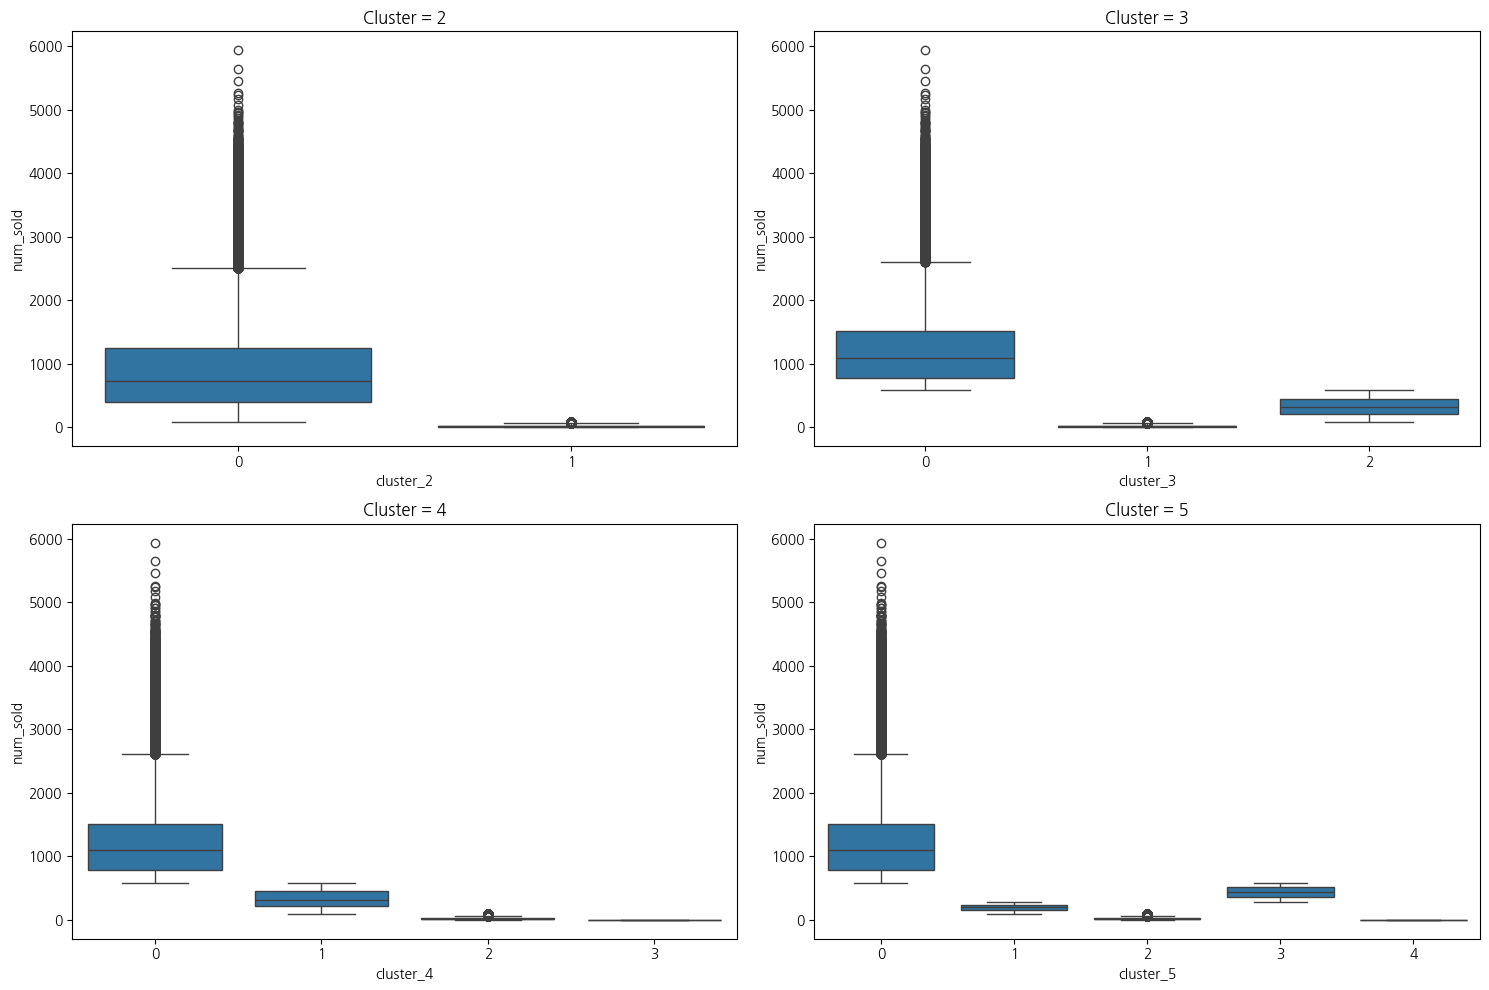

In [157]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()  

for n, i in enumerate(range(2, 6)):
    sns.boxplot(x=k_mean_train[f'cluster_{i}'], y=k_mean_train['num_sold'], ax=ax[n])
    ax[n].set_title(f'Cluster = {i}')

plt.tight_layout() 
plt.show()

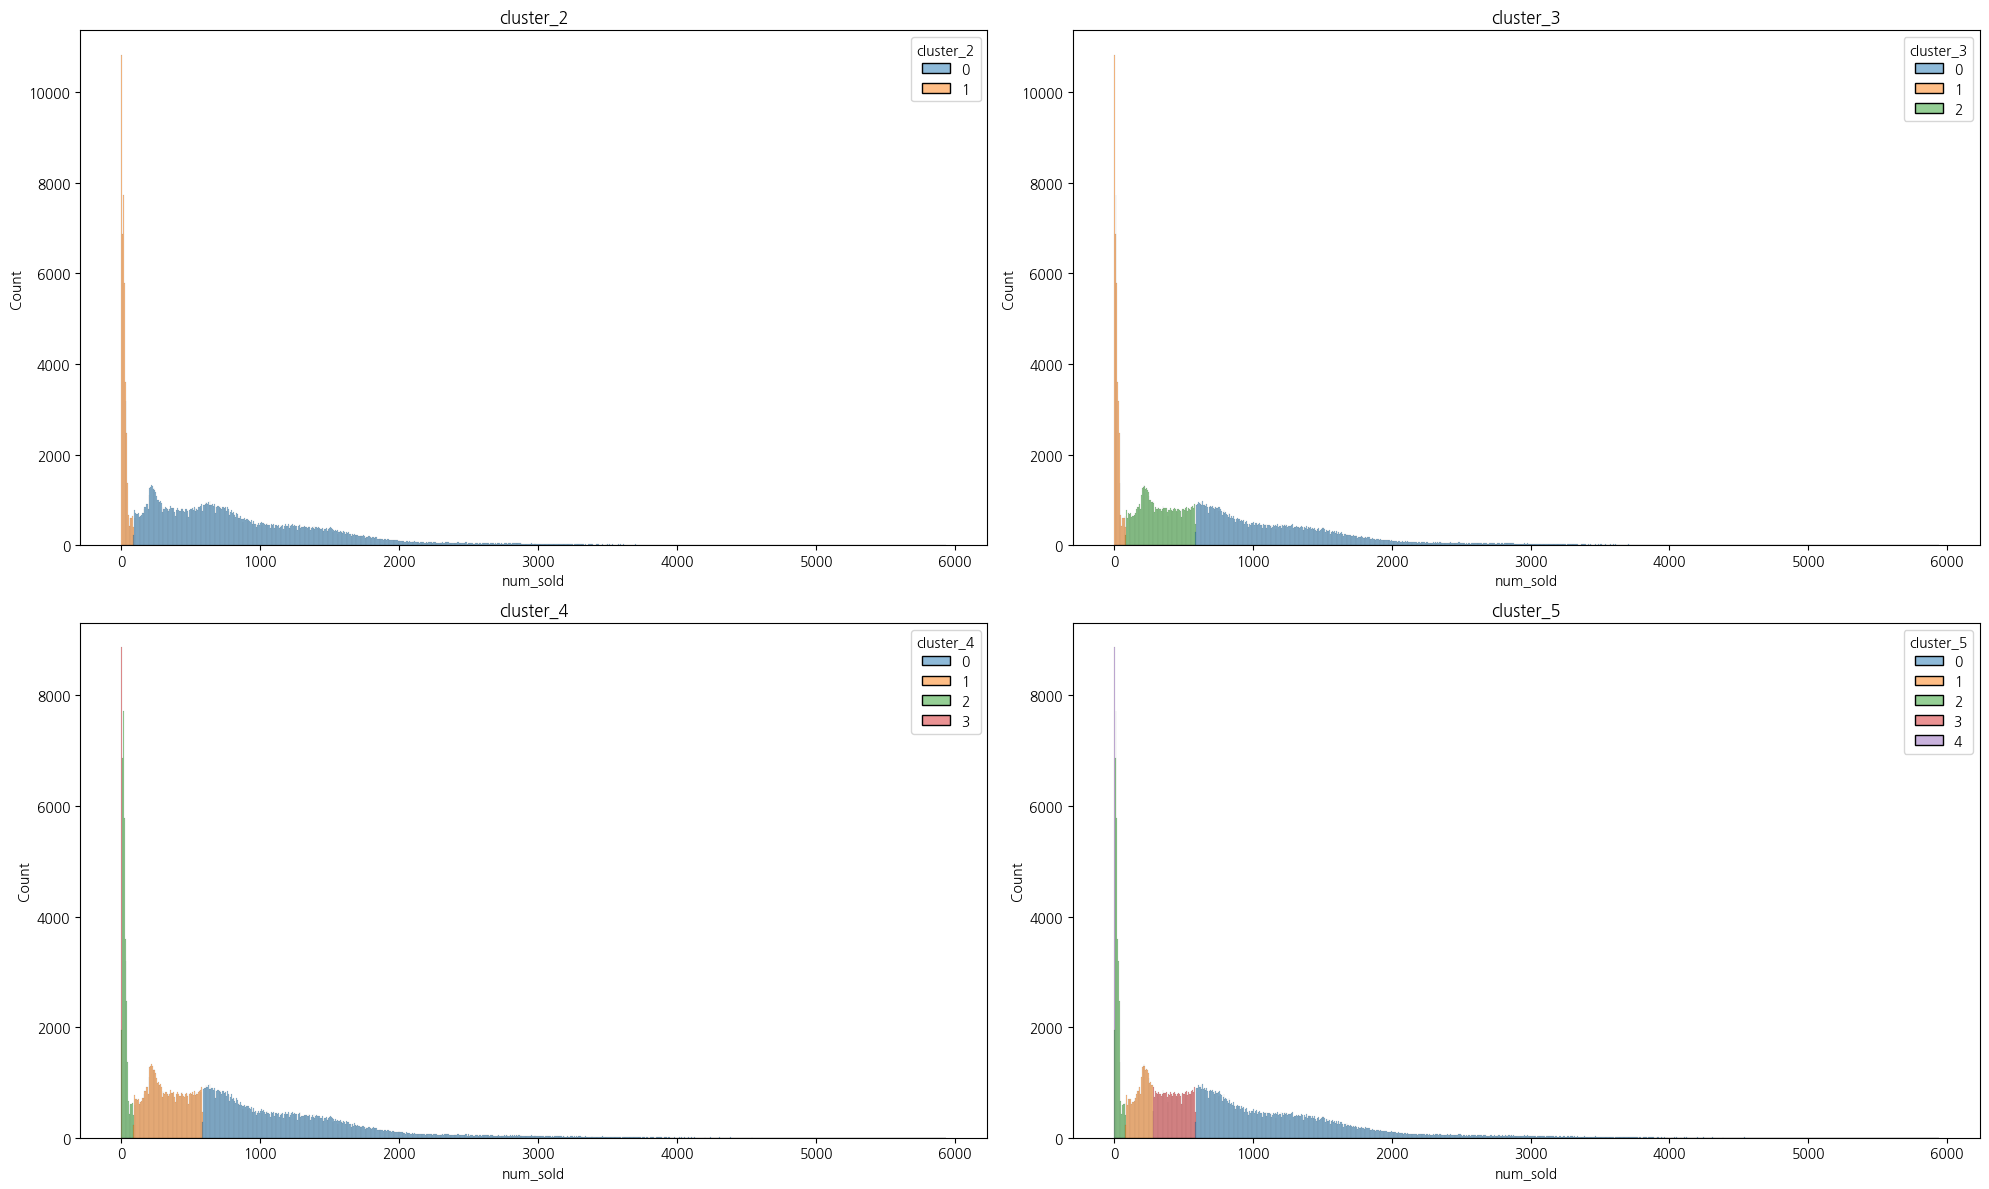

In [196]:
fig, ax = plt.subplots(2,2, figsize = (20,12))
ax = ax.flatten()



for n, i in enumerate(range(2,6)):
    sns.histplot(x= k_mean_train['num_sold'], hue = k_mean_train[f'cluster_{i}'], ax = ax[n],palette='tab10', alpha = 0.5, bins=1000)
    ax[n].set_title(f'cluster_{i}')

plt.tight_layout()
plt.show()

In [195]:
print('cluster_2 경계값', k_mean_train[k_mean_train['cluster_2'] == 1]['num_sold'].max())
print('\n')
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_3'] == 1]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_3'] == 2]['num_sold'].max())
print('\n')
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_4'] == 3]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_4'] == 2]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_4'] == 1]['num_sold'].max())
print('\n')
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_5'] == 4]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_5'] == 2]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_5'] == 1]['num_sold'].max())
print('cluster_3 경계값', k_mean_train[k_mean_train['cluster_5'] == 3]['num_sold'].max())

cluster_2 경계값 87.0


cluster_3 경계값 87.0
cluster_3 경계값 585.0


cluster_3 경계값 0.0
cluster_3 경계값 87.0
cluster_3 경계값 585.0


cluster_3 경계값 0.0
cluster_3 경계값 87.0
cluster_3 경계값 282.0
cluster_3 경계값 585.0


<span style ='color : yellow; font-size : 35px;'> 4개의 범주로 분할 </span>

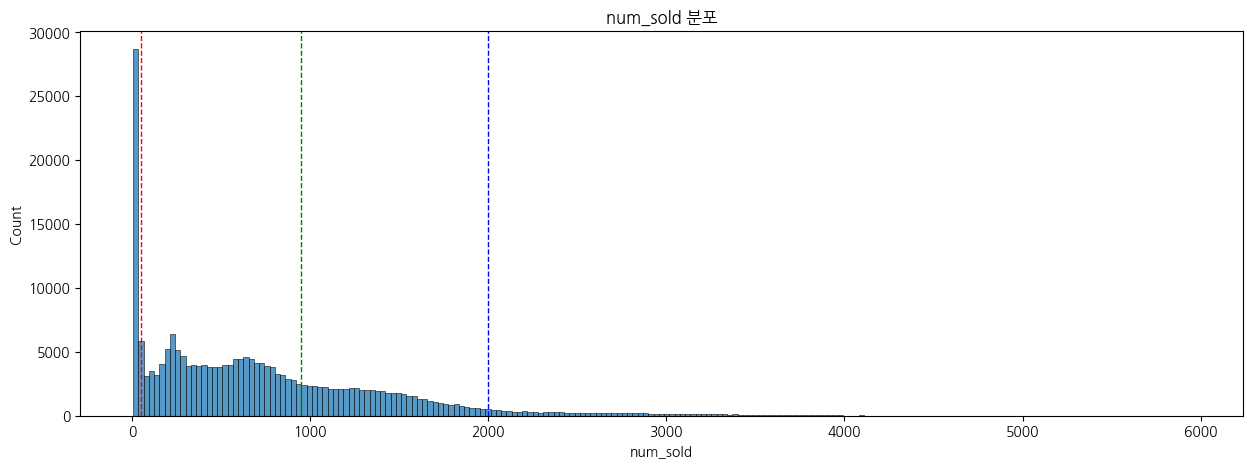

In [221]:
# 이제 다시 num_sold의 분포를 확인해보자

plt.figure(figsize = (15,5))
sns.histplot(x = train['num_sold'])
plt.axvline(x=50, color='red', linestyle='--', linewidth=1, label='x=50')
plt.axvline(x=950, color='green', linestyle='--', linewidth=1, label='x=950')
plt.axvline(x=2000, color='blue', linestyle='--', linewidth=1, label='x=2000')
plt.title('num_sold 분포')
plt.show()

In [222]:
# 군집분석의 결과를 따르기 보단
# 히스토그램을 보고 내가 직접 임의로 군집화하기로 했다
# 군집분석이 군집을 형성할 때 사용되는 알고리즘이 이 분석에 큰 도움이 되지 않다고 느꼈기 때문이다
# 물론 추후에 군집분석 결과를 기반으로 다시 분석해야할 수도 있다

# 아무튼 군집 간 경계는 다음과 같다

# 1번 군집 '극도로 낮은 판매 케이스' : min ~ 50
# 2번 군집 '낮은 판매 케이스'       : 51~950
# 3번 군집 '높은 판매 케이스'        : 951 ~ 2000
# 4번 군집 '극도로 높은 판매 케이스  : 2001 ~ max

In [15]:
# 위의 군집화에 따른 클러스터 열을 추가 해준다

cluster_train = clean_train.copy()

# 구간에 따라 클러스터 열 생성
cluster_train['cluster'] = pd.cut(cluster_train['num_sold'],
                                  bins=[cluster_train['num_sold'].min(), 50, 950, 2000, cluster_train['num_sold'].max()],
                                  labels=['very_low', 'low', 'high', 'very_high'],
                                  include_lowest=True
                                 )

# 결과 확인
cluster_train.head()

,id,date,country,store,product,num_sold,cluster
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,0.0,very_low
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,high
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,low
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,low
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,low


In [16]:
cluster_train['cluster'].value_counts()

cluster
low          119937
high          56282
very_low      42216
very_high     11695
Name: count, dtype: int64

In [91]:
print(cluster_train[cluster_train['cluster'] == 'very_low']['country'].value_counts(), '\n')
print(cluster_train[cluster_train['cluster'] == 'low']['country'].value_counts(), '\n')
print(cluster_train[cluster_train['cluster'] == 'high']['country'].value_counts(), '\n')
print(cluster_train[cluster_train['cluster'] == 'very_high']['country'].value_counts(), '\n')

country
Kenya     37946
Canada     4246
Italy        24
Name: count, dtype: int64 

country
Italy        31974
Finland      26812
Singapore    24549
Canada       22393
Norway       13800
Kenya          409
Name: count, dtype: int64 

country
Norway       14638
Singapore    12607
Canada       11388
Finland      11292
Italy         6357
Name: count, dtype: int64 

country
Norway       9917
Singapore    1199
Canada        328
Finland       251
Name: count, dtype: int64 



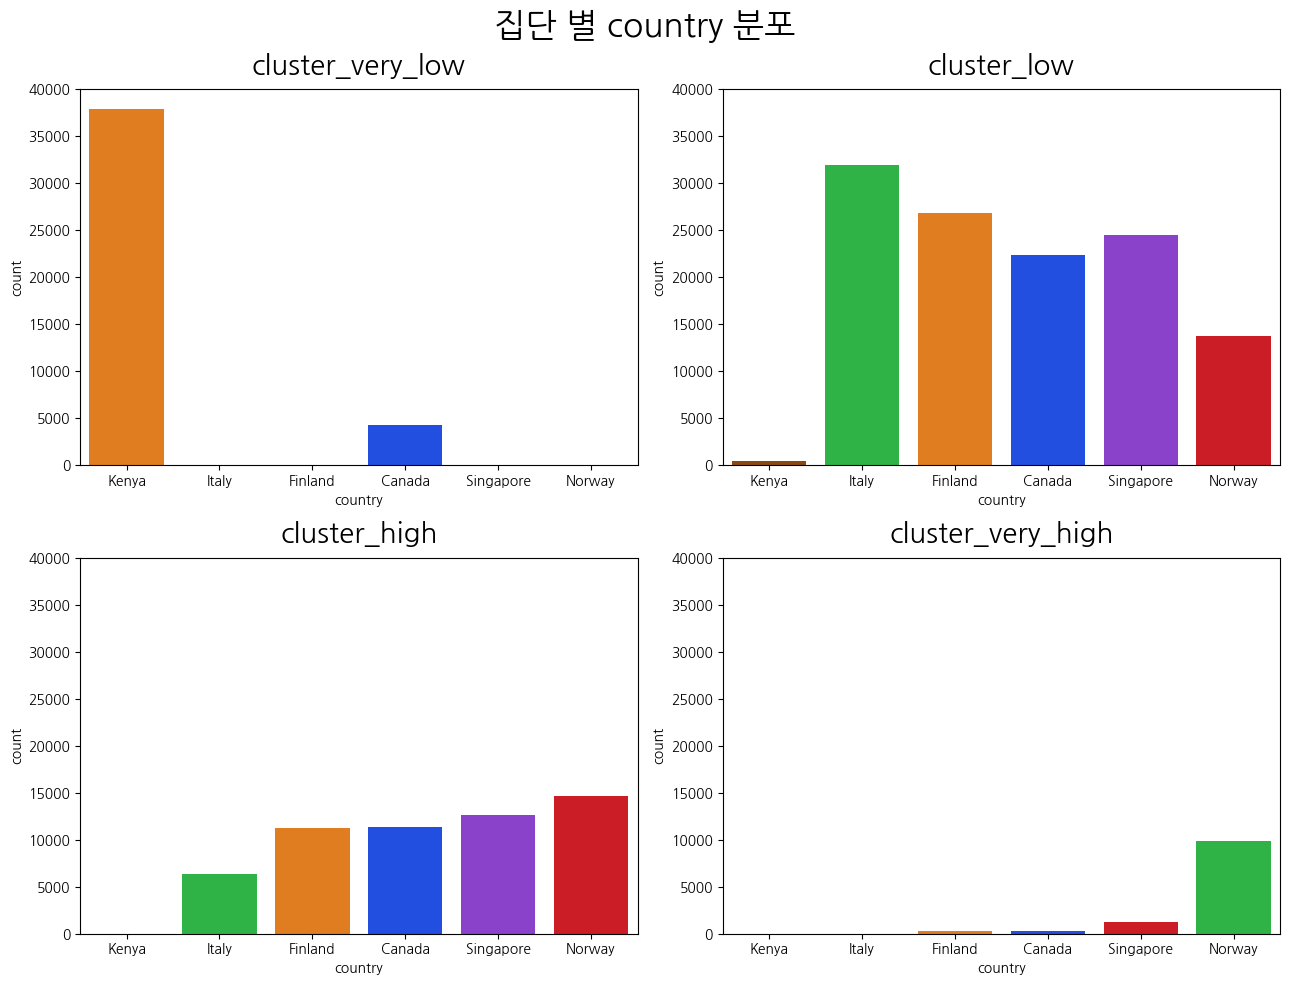

In [68]:
# cluster 별 country 분포

cluster_name = ['very_low', 'low', 'high', 'very_high']

country_palette = 'bright'

all_countries = ['Kenya', 'Italy', 'Finland', 'Canada', 'Singapore', 'Norway'] 

fig, ax = plt.subplots(2,2,figsize = (13,10))
ax = ax.flatten()

for i, cluster in enumerate(cluster_name):
    sns.countplot(x = cluster_train[cluster_train['cluster'] == cluster]['country'],
                  hue = cluster_train[cluster_train['cluster'] == cluster]['country'],
                  palette = country_palette,
                  order = all_countries,
                  ax = ax[i])
    ax[i].set_title(f'cluster_{cluster}', fontsize = 20,  y=1.02)
    ax[i].set_ylim(0, 40000)

fig.suptitle('집단 별 country 분포', fontsize=24)  # y는 제목 위치 조정
plt.tight_layout()
plt.show()

In [ ]:
# kenya는 very_low 와 low 집단에만 분포하기 때문에 country가 kenya인 케이스는 예외없이 낮은 판매량을 가지고 있다
# canada는 very_low부터 very_high까지 전부 분포하며 극단적인 집단인 very_low와 very_high에는 적게 분포한다
# italy는역시 low와 high에 대부분 분포한다 (하지만 very_low에도 약간 분포한다)
# finland역시 low와 higj에 대부분 분포한다 (하지만 very_high에도 약간 분포한다)
# singalore역시 low와 high에 대부분 분포한다 (하지만 very_high에도, 다른 중간 판매량을 기록하는 집단보다 조금더 유의미하게 분포한다)
# norway에는 low, high, very_high에 모두 분포하지만 very_high에 독보적으로 많이 분포한다

# 정리하면
# kenya는 모든 케이스가 매우 낮은 판매량
# canada는 약간 very_low가 많지만 전체적으로 넓게 분포
# italy, finland, singapore 순으로 판매량이 낮은 집단에 분포
# norway 독보적으로 높은 판매량에 집단적으로 분포

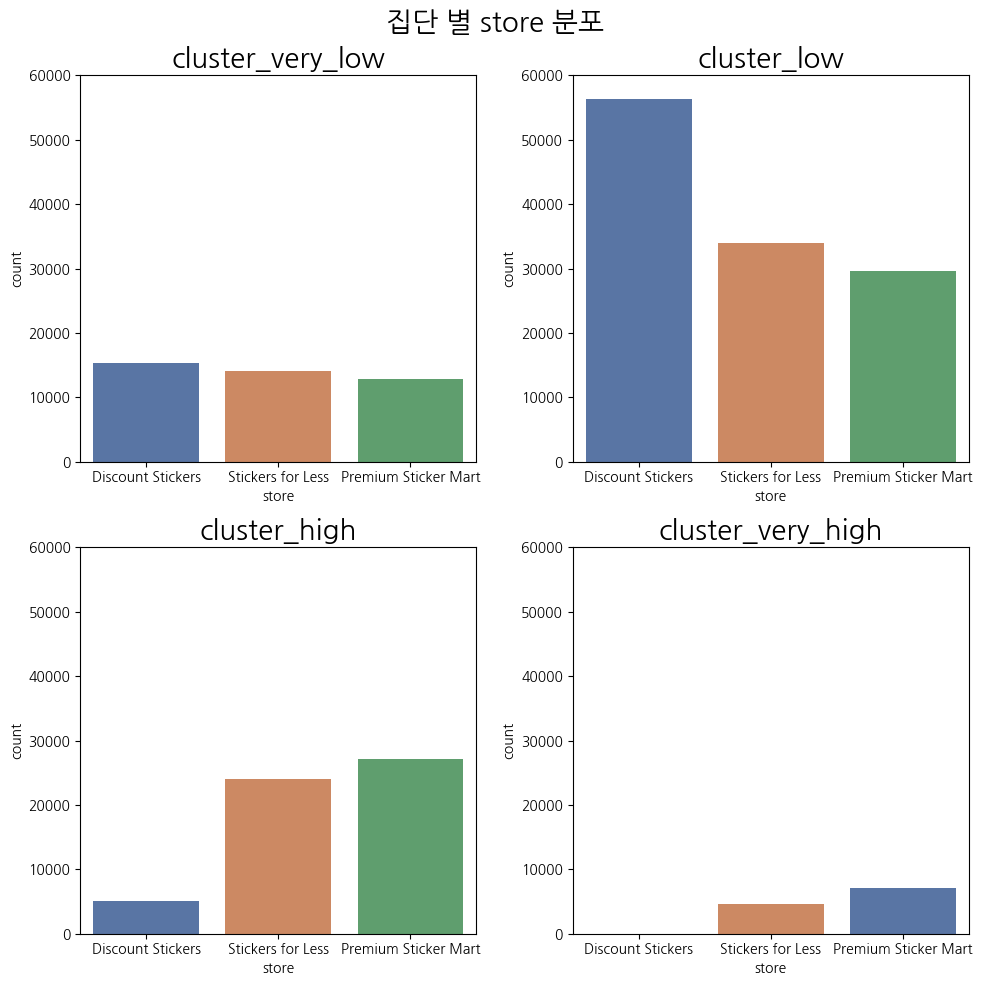

In [69]:
# cluster 별 store 분포

cluster_name = ['very_low', 'low', 'high', 'very_high']

store_colors = 'deep'

store_order = ['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'] 

fig, ax = plt.subplots(2,2,figsize = (10,10))
ax = ax.flatten()

for i, cluster in enumerate(cluster_name):
    sns.countplot(x = cluster_train[cluster_train['cluster'] == cluster]['store'],
                  hue = cluster_train[cluster_train['cluster'] == cluster]['store'],
                  palette = store_colors,
                  order = store_order,
                  ax = ax[i])
    ax[i].set_title(f'cluster_{cluster}', fontsize = 20)
    ax[i].set_ylim(0, 60000)


fig.suptitle('집단 별 store 분포', fontsize = 20)
plt.tight_layout()
plt.show()

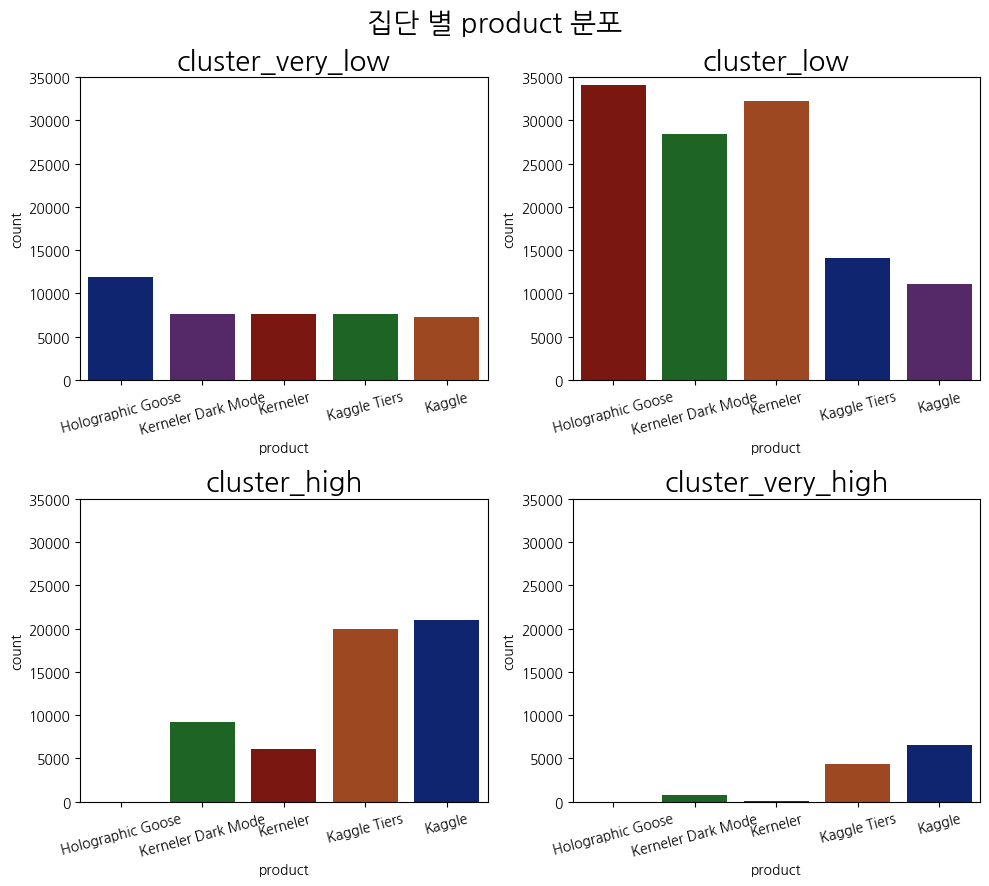

In [70]:
# cluster product 분포

cluster_name = ['very_low', 'low', 'high', 'very_high']

product_colors = 'dark'

producr_order = ['Holographic Goose', 'Kerneler Dark Mode', 'Kerneler', 'Kaggle Tiers', 'Kaggle']

fig, ax = plt.subplots(2,2,figsize = (10,9))
ax = ax.flatten()

for i, cluster in enumerate(cluster_name):
    sns.countplot(x = cluster_train[cluster_train['cluster'] == cluster]['product'],
                  hue = cluster_train[cluster_train['cluster'] == cluster]['product'],
                  order = producr_order,
                  palette = product_colors,
                  ax = ax[i])

    ax[i].set_title(f'cluster_{cluster}', fontsize = 20)
    ax[i].set_xticks(producr_order)
    ax[i].set_xticklabels(producr_order, rotation=15)
    ax[i].set_ylim(0, 35000)

fig.suptitle('집단 별 product 분포', fontsize = 20)
plt.tight_layout()
plt.show()

In [ ]:
# 일단 범주형 변수의 분포 비율을 봤을때
# 집단별로 상이하게 다른 것을 시각적으로 확인이 가능하기 때문에
# 특정한 두 집단이 서로 같은지 통계적인 검정을 할 필요는 없어보인다

# 다음은 집단별 날짜에 따른 num_sold 추이를 확인해보자

In [16]:
# 집단 별 분석을 위한 데이터 저장

low_train.to_csv('low_train', index = False)
very_low_train.to_csv('very_low_train', index = False)
high_train.to_csv('high_train', index = False)
very_high_train.to_csv('very_high_train', index = False)